# CodSoft Internship Task 2 : Movie Rating Prediction With Python

# importing the libraries

In [1]:

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder, StandardScaler  
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline 

In [2]:
# Load the Dataset
df = pd.read_csv('Rating.csv',encoding=('ISO-8859-1'),low_memory=False) 

# Data Exploration 

In [3]:

print(df.head())  
print(df.info()) 
print(df.describe()) 


                                 Name    Year  Duration           Genre  \
0                                         NaN       NaN           Drama   
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0           Drama   
2                         #Homecoming  2021.0      90.0   Drama Musical   
3                             #Yaaram  2019.0     110.0  Comedy Romance   
4                   ...And Once Again  2010.0     105.0           Drama   

   Rating  Votes            Director        Actor1              Actor2  \
0     NaN    NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0    8.0       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN    NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4   35.0          Ovais Khan       Prateik          Ishita Raj   
4     NaN    NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

            Actor3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  

In [4]:
# Check for missing values
print(df.isnull().sum())  # Check for missing values in each column


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor1      1617
Actor2      2384
Actor3      3144
dtype: int64


In [5]:
# Handle missing values
df['Rating'].fillna(df['Rating'].mean(), inplace=True)  
df.dropna(inplace=True)  

C:\Users\DELL\AppData\Local\Temp\ipykernel_13884\2448413377.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(), inplace=True)


In [6]:
# Feature Engineering
# Convert categorical features to numerical values using one-hot encoding
categorical_features=['Name','Genre','Director','Actor1','Actor2','Actor3']
numeric_features=['Year','Duration','Votes']

# Preprocessing pipeline
preprocessor=ColumnTransformer(transformers=[('num',StandardScaler(),numeric_features),('cat',OneHotEncoder(handle_unknown='ignore'), 
                                                                                            categorical_features)])


# Data splitting, Training and Testing

In [7]:
x = df.drop('Rating',axis=1)
y = df['Rating']
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
model = Pipeline(steps=[('preprocessor', preprocessor),('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year', 'Duration',
                                                   'Votes']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Name', 'Genre', 'Director',
                                                   'Actor1', 'Actor2',
                                                   'Actor3'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [9]:
# Model Evaluation
y_pred = model.predict(x_test)  
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')  
print(f'R2 Score: {r2_score(y_test, y_pred)}') 
print('Accuracy of model is',model.score(x_test,y_test)*100,'Percent')

Mean Squared Error: 1.2183111236749113
R2 Score: 0.34207354985647676
Accuracy of model is 34.207354985647676 Percent


# Vusualization

In [10]:
# Year with Best Rating
best_rating_year=df.groupby('Year')['Rating'].mean().idxmax() 
print('Year with Best Average Rating: ',best_rating_year)

Year with Best Average Rating: 1952.0


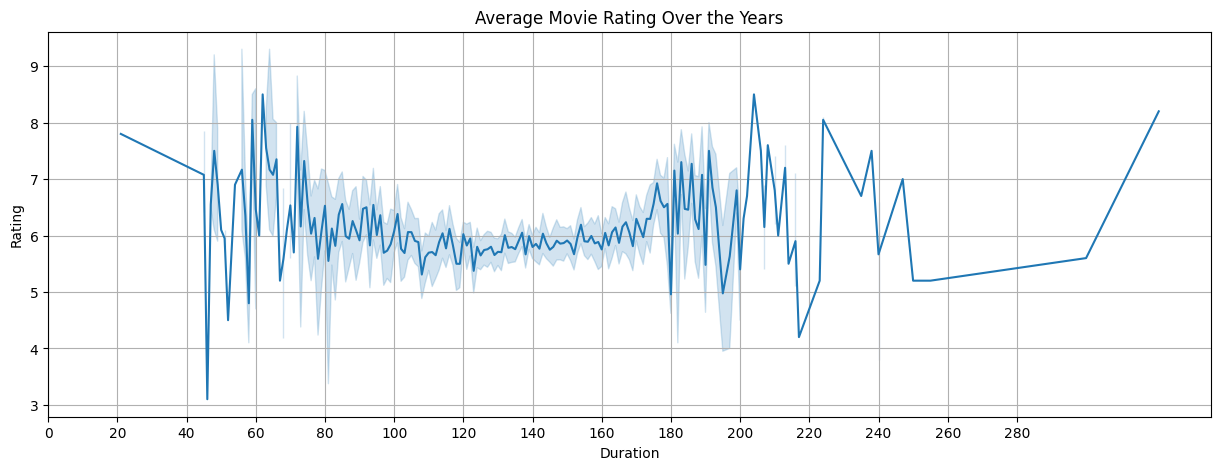

In [11]:
# Does length of movie have any impact with the rating?
plt.figure(figsize=(15, 5))
sns.lineplot(data=df,x='Duration',y='Rating') 
plt.title('Average Movie Rating Over the Years')  
plt.xticks(np.arange(-0, 300, 20))
plt.grid(True)

In [12]:
# Top 10 movies according to rating per year and overall
top_10_movies_overall=df.nlargest(10, 'Rating')  # Get the top 10 movies overall based on rating
print('Top 10 Movies Overall:')
print(top_10_movies_overall[['Name','Year','Rating']])

Top 10 Movies Overall:
                      Name    Year  Rating
8339       Love Qubool Hai  2020.0    10.0
5410            Half Songs  2021.0     9.7
5077          Gho Gho Rani  2019.0     9.4
6852                  June  2021.0     9.4
14222  The Reluctant Crime  2020.0     9.4
1314          Ashok Vatika  2018.0     9.3
1729              Baikunth  2021.0     9.3
5125           God of gods  2019.0     9.3
8344          Love Sorries  2021.0     9.3
11843              Refl3ct  2021.0     9.3


In [13]:
top_10_movies_per_year=df.sort_values(['Year', 'Rating'], ascending=[True, False]).groupby('Year').head(10)  
print('Top 10 Movies Per Year:')
print(top_10_movies_per_year[['Name','Year','Rating']])

Top 10 Movies Per Year:
                         Name    Year  Rating
14161  The Light of the World  1931.0     6.2
4171                 Draupadi  1931.0     5.3
6073               Indrasabha  1932.0     6.0
4658                     Fate  1933.0     6.2
9053                  Mazdoor  1934.0     8.5
...                       ...     ...     ...
12673      Secrets of Sinauli  2021.0     9.3
6952                   Kaadan  2021.0     9.1
3224        Consequence Karma  2021.0     9.0
9504             Moral Nights  2021.0     9.0
14898                  Viraat  2021.0     8.9

[817 rows x 3 columns]


In [14]:
# Number of popular movies released each year
popular_movies_per_year=df[df['Rating'] > 8.0].groupby('Year').size() 
print('Number of Popular Movies Released Each Year:')
print(popular_movies_per_year)

Number of Popular Movies Released Each Year:
Year
1934.0     1
1940.0     1
1952.0     1
1953.0     1
1955.0     2
1956.0     1
1957.0     2
1960.0     1
1962.0     1
1964.0     2
1965.0     1
1966.0     1
1968.0     2
1969.0     1
1970.0     1
1971.0     1
1972.0     2
1974.0     1
1975.0     5
1976.0     1
1978.0     1
1979.0     1
1980.0     2
1982.0     1
1983.0     5
1984.0     2
1985.0     3
1987.0     1
1988.0     2
1989.0     2
1990.0     1
1992.0     1
1994.0     1
1995.0     1
1998.0     1
1999.0     1
2000.0     1
2001.0     3
2002.0     2
2003.0     3
2004.0     2
2005.0     3
2006.0     3
2007.0     4
2008.0     3
2009.0     2
2010.0     1
2011.0     2
2012.0     9
2013.0     4
2014.0     5
2015.0     9
2016.0     8
2017.0    14
2018.0    16
2019.0    23
2020.0    13
2021.0    19
dtype: int64


In [15]:
# Counting the number of votes which movies performed better in rating per year and overall
top_voted_movies=df.sort_values(['Votes','Rating'],ascending=[False, False]).groupby('Year').head(10)  
print('Top Voted Movies Per Year:')
print(top_voted_movies[['Name','Year','Votes','Rating']])

Top Voted Movies Per Year:
                         Name    Year     Votes  Rating
8219               Life of Pi  2012.0  591417.0     7.9
75                   3 Idiots  2009.0  357889.0     8.4
8233                     Lion  2016.0  220526.0     8.0
4848                   Gandhi  1982.0  220118.0     8.0
14038  The Darjeeling Limited  2007.0  185127.0     7.2
...                       ...     ...       ...     ...
4081                   Doctor  1940.0       6.0     6.5
4171                 Draupadi  1931.0       6.0     5.3
6736              Jiban Maran  1938.0       6.0     5.2
15396                Zamindar  1943.0       6.0     3.3
12969                 Shehnai  1947.0       5.0     4.2

[817 rows x 4 columns]


In [16]:
top_voted_movies_overall=df.sort_values(['Votes','Rating'], ascending=[False, False]).head(10) 
print('Top Voted Movies Overall:')
print(top_voted_movies_overall[['Name','Votes','Rating']])

Top Voted Movies Overall:
                         Name     Votes  Rating
8219               Life of Pi  591417.0     7.9
75                   3 Idiots  357889.0     8.4
8233                     Lion  220526.0     8.0
4848                   Gandhi  220118.0     8.0
14038  The Darjeeling Limited  185127.0     7.2
8228      Like Stars on Earth  175810.0     8.4
10882                      PK  168150.0     8.1
3410                   Dangal  165074.0     8.4
11463                   Radhe  162455.0     1.8
3829              Dil Bechara  117377.0     6.6


In [17]:
# Which director directed the most movies
most_prolific_director = df['Director'].value_counts().idxmax() 
print(f'The Most Prolific Director: {most_prolific_director}')


The Most Prolific Director: David Dhawan


In [18]:
# Which actor starred in the most movies
actor_columns=['Actor1', 'Actor2', 'Actor3']
all_actors=df[actor_columns].values.ravel()  
most_frequent_actor=pd.Series(all_actors).value_counts().idxmax() 
print(f'The Actor Who Starred in the Most Movies: {most_frequent_actor}')

The Actor Who Starred in the Most Movies: Mithun Chakraborty


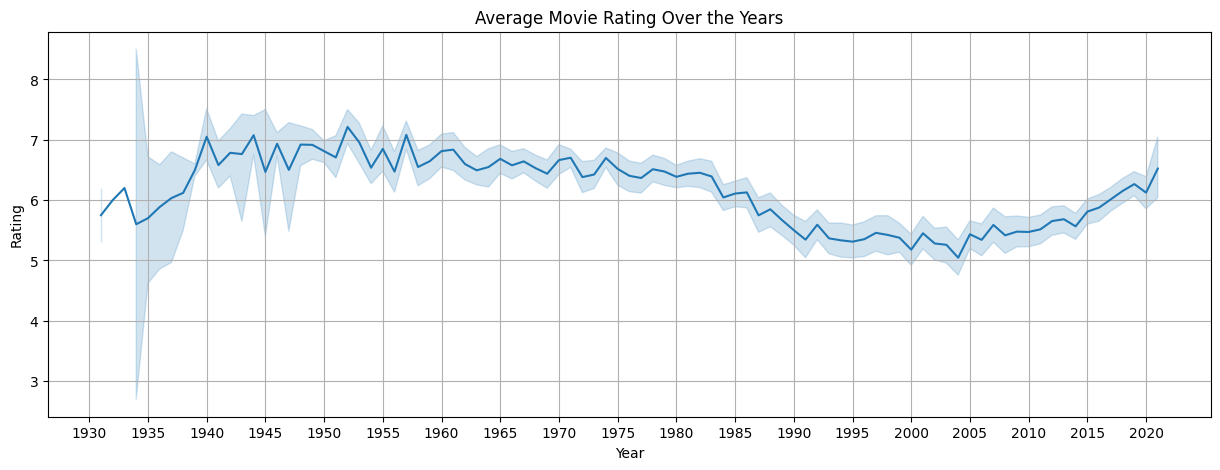

In [19]:
# Additional Trends and Future Predictions

# Ratings over the years
plt.figure(figsize=(15, 5))
sns.lineplot(data=df,x='Year',y='Rating') 
plt.title('Average Movie Rating Over the Years')  
plt.xticks(np.arange(1930, 2024, 5))
plt.grid(True)

In [20]:
new_movie ={'Name':['Influence'],'Year':[2024],'Duration':[120],'Genre':['Action'],'Votes':[1000],'Director':['Christopher Nolan'],'Actor1':['Leonardo DiCaprio'],'Actor2':['Joseph Gordon-Levitt'],'Actor3':['Ellen Page']}
new_movie_df=pd.DataFrame(new_movie)
new_movie_rating=model.predict(new_movie_df)
print('Predicted Rating for the New Movie: ',new_movie_rating[0])

Predicted Rating for the New Movie:  5.536000000000001
